In [34]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [35]:
# 정답 저장!
y = train['Survived']

## 데이터 전처리

In [36]:
# 트레이닝, 테스트 데이터 >>성별<< 이진화, female = 1, female = 0
embarked_mapping = {'female': 1, 'male': 0}
train['Sex'] = train['Sex'].map(embarked_mapping)
test['Sex'] = test['Sex'].map(embarked_mapping)

# embarked null값 그냥 S로 채운 후 S, C, Q값 숫자로 바꿔주기
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

# 이름 길이(Name_length) 추가하기
train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

# fare 매핑
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train['Fare'] = np.where(train['Fare'] <= 7.91, 0, train['Fare'])
train['Fare'] = np.where((train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 1, train['Fare'])
train['Fare'] = np.where((train['Fare'] > 14.454) & (train['Fare'] <= 31), 2, train['Fare'])
train['Fare'] = np.where(train['Fare'] > 31, 3, train['Fare'])
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = np.where(test['Fare'] <= 7.91, 0, test['Fare'])
test['Fare'] = np.where((test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 1, test['Fare'])
test['Fare'] = np.where((test['Fare'] > 14.454) & (test['Fare'] <= 31), 2, test['Fare'])
test['Fare'] = np.where(test['Fare'] > 31, 3, test['Fare'])
test['Fare'] = test['Fare'].astype(int)

#age 매핑
age_avg = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_avg)
test['Age'] = test['Age'].fillna(age_avg)
test['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
train['Age'] = np.where(train['Age'] <= 16, 0, train['Age'])
train['Age'] = np.where((train['Age'] > 16) & (train['Age'] <= 32), 1, train['Age'])
train['Age'] = np.where((train['Age'] > 32) & (train['Age'] <= 48), 2, train['Age'])
train['Age'] = np.where((train['Age'] > 48) & (train['Age'] <= 64), 3, train['Age'])
train['Age'] = np.where(train['Age'] > 64, 4, train['Age'])
test['Age'] = np.where(test['Age'] <= 16, 0, test['Age'])
test['Age'] = np.where((test['Age'] > 16) & (test['Age'] <= 32), 1, test['Age'])
test['Age'] = np.where((test['Age'] > 32) & (test['Age'] <= 48), 2, test['Age'])
test['Age'] = np.where((test['Age'] > 48) & (test['Age'] <= 64), 3, test['Age'])
test['Age'] = np.where(test['Age'] > 64, 4, test['Age'])
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

# 없앨 feature들,,
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)


In [37]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length
0,1,0,3,0,1,1,0,0,1,23
1,2,1,1,1,2,1,0,3,2,51
2,3,1,3,1,1,0,0,1,1,22
3,4,1,1,1,2,1,0,3,1,44
4,5,0,3,0,2,0,0,1,1,24
5,6,0,3,0,1,0,0,1,3,16
6,7,0,1,0,3,0,0,3,1,23
7,8,0,3,0,0,3,1,2,1,30
8,9,1,3,1,1,0,2,1,1,49
9,10,1,2,1,0,1,0,2,2,35


In [38]:
# w, x값 받아서 방정식값 출력
def lin_val(x_arr):
    temparr = []
    for x in x_arr:
        temparr.append([x])
    linalg = np.asmatrix([w_arr]) * np.asmatrix(temparr)
    result = linalg.A
    return result[0][0]

# 일단 w0, w1, w2, w3만 사용, 더쓸거면 추가!!
## sex, age, fare

In [39]:
w_arr = []    # w값들을 배열에 저장해서 사용할 겁니다.
# 일단은 w 두개!
w_arr=[random.random(), random.random(), random.random(), random.random()]

x_arr = []
for i in range(train.shape[0]):
    x_arr.append([0, train['Sex'][i], train['Age'][i], train['Embarked'][i]])

In [40]:
w_arr

[0.6728199872653182,
 0.1234644194255401,
 0.26186618487682367,
 0.9544473236037563]

In [41]:
# sigmoid func
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# predicting func
def pred_probability(x_arr):
    z = lin_val(x_arr)
    return sigmoid(z)
# loss func
def cost_func():
    sum = 0
    for i in range(train.shape[0]):
        probability = pred_probability(x_arr[i])
        sum += y[i] * np.log(probability) + (1 - y[i]) * np.log(1 - probability)
    total_cost = -(1/train.shape[0]) * sum
    return total_cost       

# x값 추가되면 바꿔줘야함...

In [42]:
predicted_right = 0
for index, row in train.iterrows():
    probability = pred_probability([0, row['Sex'], row['Age'], row['Embarked']])
    if (probability > 0.5):
        if (y[index] == 1):
            predicted_right += 1
    else:
        if (y[index] == 0):
            predicted_right += 1
print("train_accuracy:", (predicted_right/train.shape[0])*100, "%")

train_accuracy: 38.38383838383838 %


In [43]:
# cost 함수 미분한것, w_num번째 w값에 대해 미분?
def gradient_derivate(w_num):
    sum = 0
    for i in range(train.shape[0]):
        probability = pred_probability(x_arr[i])
        if (w_num == 0):
            sum += (probability - y[i])
        else:
            sum += (probability - y[i]) * x_arr[i][w_num]
    return (1/train.shape[0]) * sum

w_zero_graph = []
w_one_graph = []
w_two_graph = []
w_three_graph = []
w_cost = []

import time
# iteration만큼 반복
def converge(iteration):
    alpha = 0.01
    start_time = time.time()
    for i in range(iteration):
        temp_arr = w_arr[:]
        for j in range(len(w_arr)):
            w_arr[j] = w_arr[j] - alpha * gradient_derivate(j)
#             print(j, "번째 w?", w_arr[j], "||", "원래:", temp_arr[j])
            if (j == 0):
                w_zero_graph.append(w_arr[j])
            elif (j == 1):
                w_one_graph.append(w_arr[j])
            elif (j == 2):
                w_two_graph.append(w_arr[j])
            elif (j == 3):
                w_three_graph.append(w_arr[j])
            if (w_arr[j] > 1 or w_arr[j] < -1):
                break
            
        if (i % 100 == 0):
            print(i, "번째 학습,,,")
            w_cost.append(cost_func())
            if (w_cost[-1] < 0.1):
                break
#         print("cost:", w_cost[i])
#         print("-----------------------------------------------------------")
    print("WorkingTime: %s sec" %(time.time() - start_time))
    plt.plot(w_zero_graph, label='w0')
    plt.plot(w_one_graph, label='w1')
    plt.plot(w_two_graph, label='w2')
    plt.plot(w_three_graph, label='w3')
    plt.legend()
    plt.show()
    plt.plot(w_cost, label="cost")
    plt.legend()
    plt.show()

0 번째 학습,,,
100 번째 학습,,,
200 번째 학습,,,
300 번째 학습,,,
400 번째 학습,,,
500 번째 학습,,,
600 번째 학습,,,
700 번째 학습,,,
800 번째 학습,,,
900 번째 학습,,,
1000 번째 학습,,,
WorkingTime: 340.11022543907166 sec


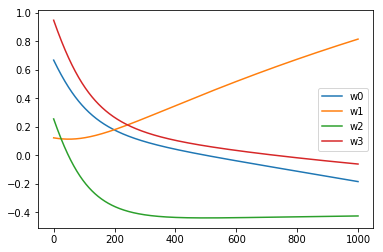

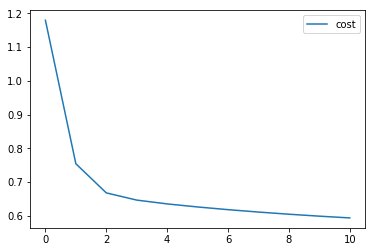

train_accuracy: 71.94163860830527 %


In [44]:
converge(1001)
predicted_right = 0
for index, row in train.iterrows():
    probability = pred_probability([0, row['Sex'], row['Age'], row['Embarked']])
    if (probability > 0.5):
        if (y[index] == 1):
            predicted_right += 1
    else:
        if (y[index] == 0):
            predicted_right += 1
print("train_accuracy:", (predicted_right/train.shape[0])*100, "%")

In [31]:
test_index = 892
submission = pd.DataFrame({"PassengerId": [], "Survived": [] })
for index, row in test.iterrows():
    probability = pred_probability([0, row['Sex'], row['Age'], row['Embarked']])
    if (probability > 0.5):
        submission.loc[test_index] = [test_index, 1]
    else:
        submission.loc[test_] = [test_index, 0]
    test_index += 1
submission['PassengerId'] = submission['PassengerId'].astype(int)
submission['Survived'] = submission['Survived'].astype(int)

In [32]:
submission.to_csv("my_second_submission.csv", index=False)